<img src="LogoColorHorizontal.png" style="width:200px" align="left">    <img src="MetaWorksLogo.png" style="width:200px" align="right">

# Analyzing Different Modulation Patterns (April 1, 2020)

***

Initialize general modules for math and plotting:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. The ideal polarizability distribution

Once an architecture has been defined for a metasurface antenna, a modulation scheme must be applied to select the element polarizabilities that will achieve a desired beam form. To obtain a plane wave from an aperture, the aperture field must have the form of a traveling wave with a period set by the parallel component of the wave vector corresponding to the desired plane wave. Assuming the desired plane wave has the form:

$\textbf{E}(\textbf{r})=\textbf{E}_0 e^{-j \textbf{k}_b \cdot \textbf{r}}$

Such a field distribution requires an effective magnetic current in the aperture plane defined by

$\textbf{K}_M = \textbf{E} \times \hat{\textbf{n}} = \textbf{E}_0 \times \hat{\textbf{n}}e^{-j \textbf{k}_b \cdot \textbf{r}}$

The effective magnetic surface current is approximated by the field radiated from the metamaterial elements, each of which behaves as a polarizable magnetic dipole excited by an underlying feed wave. That is,

$\textbf{K}_M(\textbf{r})=-j \omega \mu_0 \bar{\chi}_M(\textbf{r})\textbf{H}_f(\textbf{r})$

where $\bar{\chi}_M(\textbf{r})$ is the surface susceptibility, defined as the magnetic dipole per unit area. For general control of a wave including polarization, we must consider two lattices of dipoles with orthogonal orientation, so that

$\bar{\chi}_M(\textbf{r})=\chi_1(\textbf{r})\hat{\nu}\otimes \hat{\nu}+\chi_2(\textbf{r})\hat{\mu}\otimes \hat{\mu}$

Finally, the ideal polarizabilities can be written as

$\alpha^i_1 = \frac{j \Lambda^2}{Z_0 k}\textbf{E}_0 \cdot (\hat{n} \times \hat{\nu}_i) \frac{e^{-j \textbf{k}_b \cdot \textbf{r}_i}}{\textbf{H}_f \cdot \hat{\nu}_i}$,  
$\alpha^i_2 = \frac{j \Lambda^2}{Z_0 k}\textbf{E}_0 \cdot (\hat{n} \times \hat{\mu}_i) \frac{e^{-j \textbf{k}_b \cdot \textbf{r}_i}}{\textbf{H}_f \cdot \hat{\mu}_i}$

To make things simple to follow, we assume here a one-dimensional feed structure with metamaterial elements behaving as magnetic dipoles oriented perpendicular to the feed direction. The feed direction is taken as the $\hat{x}$ direction, with the magnetic dipoles oriented along the $\hat{z}$ direction. The $\hat{y}$ direction is perpendicular to the antenna direction (broadside). In this case, the polarizability for each element reduces to

$\alpha^i = \frac{j \Lambda^2}{Z_0 k}\frac{E_{0,x}}{H_{f,z}(\textbf{r}_i)}  e^{-j \textbf{k}_b \cdot \textbf{r}_i}$

If the feed wave is a guided mode that propagates along the one-dimensional guide, then the magnetic field will have the form

$H_{f,x}(\textbf{r}_i)=H_0 e^{-j \beta x}$

There may be other factors if, for example, the magnetic field varies across the guide in the $\hat{z}$ direction and the metamaterial element positions are varied in $\hat{z}$, as in some designs. For the example here, we consider all elements centered on the waveguide, so that

$\alpha^i =\frac{j \Lambda^2}{Z_0 k}\frac{E_{0,x}}{H_0} e^{j x_i(\beta - k \sin{\phi_b} )} = \alpha_0 e^{j \Psi_i} $

The magnitude $\alpha_0$ can be normalized, since the magnitude of the outgoing plane wave is not important at this stage and it is assumed the incident feed wave is not perturbed by the metasurface. The phase factor $\Psi_i = x_i (\beta-k \sin{\phi_b})$ is crucial to achieving the plane wave. We thus term the above polarizability as ideal:

<span style='background:yellow'> 
       Ideal Polarizability: $\alpha^i_{\textrm{ideal}}=\alpha_0 e^{j x_i(\beta-k \sin{\phi_b})}$
<\span>

## 2. Lorentzian constrained polarizability

Metamaterial resonators do not have polarizabilities with independently controllable phase and magnitude. Rather, the phase and magnitude are constrained through the properties of a passive resonator, often having the form of a Lorentzian, or

$\alpha_m(\omega)=\frac{F \omega^2}{\omega_0^2 - \omega^2 + j \Gamma \omega}$

The explicit relationship between magnitude and phase can be more easily seen by writing the above equation as

$\alpha_m = F\frac{\omega}{\Gamma} \sin{\theta}e^{-j \theta}$

or

$|\alpha_m| = F\frac{\omega}{\Gamma} |\sin{\theta}|$

At a given operating frequency, then, the magnitude of the polarizability is simply linked to its phase. It's useful to plot this relationship in complex space to visualize the impact of the Lorentzian constraint. The ideal polarizability values lie on a circle of radius $|\alpha_m|$ and can assume any value of phase (0 to 360 degrees). The Lorentzian constrained values also lie on a circle, but which is contained in the lower half plane.

<function matplotlib.pyplot.show(*args, **kw)>

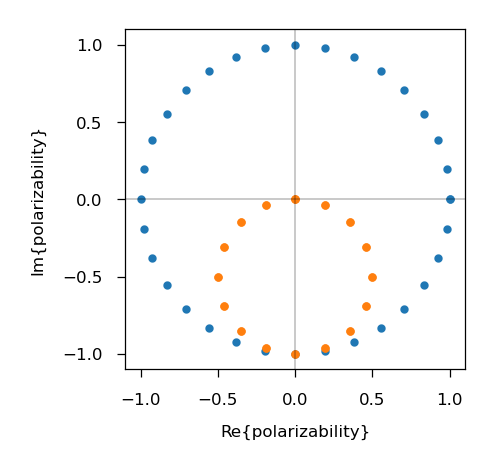

In [2]:
angles = np.linspace(0,360,33)*np.pi/180.
alphIdeal = np.exp(np.multiply(1j,angles))
alphCons = -np.multiply(np.sin(angles),np.exp(np.multiply(1j,angles)))
fig, ax = plt.subplots(figsize=(1.5,1.5),dpi=300)
ax.axhline(y=0, color='k', lw=.1)
ax.axvline(x=0, color='k',lw=.1)
ax.scatter(np.real(alphIdeal),np.imag(alphIdeal),1)
ax.scatter(np.real(alphCons),np.imag(alphCons),1)
ax.set_aspect(1)
plt.xticks([-1,-.5,0,.5,1],fontsize=4)
plt.yticks([-1,-.5,0,.5,1],fontsize=4)
ax.tick_params(length=2, width=.3)
ax.spines['left'].set_linewidth(.3)
ax.spines['right'].set_linewidth(.3)
ax.spines['top'].set_linewidth(.3)
ax.spines['bottom'].set_linewidth(.3)
ax.set_xlabel('Re{polarizability}',fontsize=4)
ax.set_ylabel('Im{polarizability}',fontsize=4)
plt.show

Since the only available polarizability values lie on the constrained circle, it is necessary to find a mapping between the ideal polarizabilties and the constrained polarizabilities. Two strategies that provide an optimization for this mapping are the *array-factor optimized mapping* and the *Euclidean mapping*. Both of these mapping approaches achieve good beam-forming performance.

## 3. Array-factor optimized mapping

The array factory for the one-dimensional metasurface antenna has the form:

$AF(\phi,\theta)=\cos{\theta} \sum_{i=1}^N \alpha^i_m(\omega)e^{-j \beta x_i}e^{j k x_i \sin{\phi}}$

Using the ideal polarizability, we obtain

$AF(\phi,\theta)=\cos{\theta} \sum_{i=1}^N \alpha_0 e^{j k x_i (\sin{\phi}-\sin{\phi_b})}$

which produces a single beam at the scan angle $\phi_b$. However, since the ideal polarizabilities are not accessible from passive resonators, we need to find a form consistent with the Lorentzian constrained polarizaiblity that optimizes the array factor. Such a mapping can be found by noting the inherent form of the constrained polarizability: 

$\alpha_m = F\frac{\omega}{\Gamma} \sin{\theta}e^{-j \theta} = F\frac{\omega}{\Gamma}(\frac{e^{j \theta}-e^{-j \theta}}{2 j})e^{-j \theta}=-j F\frac{\omega}{\Gamma}\frac{1-e^{-2 j \theta}}{2} = \alpha_{\textrm{AF opt}} \frac{1-e^{-2 j \theta}}{2}$

Noting the form of the array factor, we see that if $\theta = -x_i(\beta - k \sin{\phi_b})/2$, we obtain the exact same main beam as above, but with only one additional grating lobe:

$AF(\phi,\theta)=\cos{\theta} \alpha_{\textrm{AF opt}} \sum_{i=1}^N (e^{-j \beta x_i}e^{j k x_i \sin{\phi}}-e^{j k x_i (\sin{\phi}-\sin{\phi_b})})$

In many situations, the grating lobe is beyond cutoff and thus there are no beams other than the main directed beam. In summary, the array factor optimized modulation is

<span style='background:yellow'> 
    $\alpha^i_{\textrm{AF opt}}=\alpha_{\textrm{AF opt}}\frac{1-e^{j x_i(\beta - k \sin{\phi_b})}}{2}$
<\span>

#### Managing the grating lobe

The condition for the grating lobe can be found from the array factor's first term above. Since the first term does not changed by addition of a phase factor of $2 \pi m$, the grating lobe condition is

$-\beta x_i + k x_i \sin{\phi} + 2 \pi m = 0$

or, if the periodicity is $d$,

$-n_g k d + k d \sin{\phi}+2 \pi m =0$

$\sin{\phi} = n_g - \frac{\lambda}{d}m$

This last expression shows that when the guide index is moderately greater than one and element spacing is much smaller than the wavelength, all grating lobes are rejected. However, if the guide index becomes large and the spacing between elements closer to half a wavelength, then the grating lobe can be formed. 

A plot of the mapping is shown below. The outer circle represents the ideal polarizability values, while the inner circle represents the Lorentzian constrained polarizability. The arrows indicate the positions of ideal polarizability values and where they are mapped to on the constrained surface. Lines continue the arrows, which are shown to converge at a single point, $\alpha_m = -j$.

The geometry of the polarizability map can be made quantitative by considering the map in the following form:

$\alpha^{AF} = \frac{\alpha^0-j}{2}$

From this expression, we can easily determine the mapped coordinates of the constrained polarizability in terms of the ideal polarizability as

$\alpha^{AF}_r = \frac{\alpha^0_r}{2},   \alpha^{AF}_i = \frac{\alpha^0_i-1}{2}$

The slope of the line can be then calculated as

$m=\frac{\alpha^0_i-\alpha^{AF}_i}{\alpha^0_r-\alpha^{AF}_r} = \frac{\alpha^0_i+1}{\alpha^0_r}$

The equation for a line can thus be written generally as

$(\alpha_i - \alpha^0_i) = m(\alpha_r - \alpha^0_r)$

Now, if $\alpha_r=0$, then from the above expression we find that $\alpha_i = -1$ regardless of the originating location, so that all lines pass through the point $(0,-1)$.

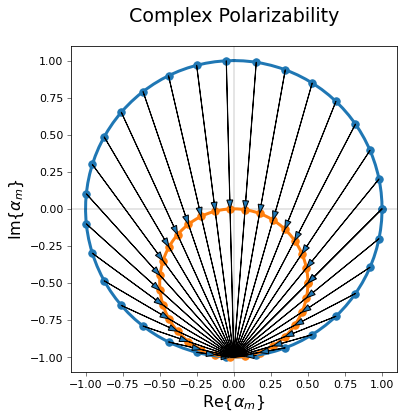

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from DataAnalysis import DataAnalysis
from SystemArchitecture import SystemArchitecture
from ModulationPattern import ModulationPattern

cm = 0.01
GHz = 1e9

sa1 = SystemArchitecture()
sa2 = SystemArchitecture()
mp1 = ModulationPattern(sa1, modulation_type='ideal')
mp2 = ModulationPattern(sa2, modulation_type='af-optimized')
dt = DataAnalysis()

sa1.guideIndex = 1.0
wv = sa1.wavelength_op
spc = wv/31
sa1.MakeLinearArray(spc, aperture_size = wv)
mp1.DirectedBeam(sa1,0)

sa2.guideIndex = 1.0
wv = sa2.wavelength_op
sa2.MakeLinearArray(spc, aperture_size = wv)
sa2.dipoleType = 'ideal-constrained-lorentzian'
mp2.DirectedBeam(sa2,0)

fig, ax = plt.subplots()
fig.set_size_inches(6,6)

theta = np.linspace(-270*np.pi/180, 90*np.pi/180, 100)
r = 1
xc = r*np.cos(theta)
yc = r*np.sin(theta)

ax.plot(xc,yc, linewidth=3)

theta = np.linspace(80*np.pi/180, -260*np.pi/180, 100)
r = 0.5
xc = r*np.cos(theta)
yc = r*np.sin(theta)-.5

dt.PlotComplexPolarizabilityValues(sa1.alpha,normalize=True, suppress_plot=True, plot_reference = ax, plot_size=8, dpi=100, marker_size=55)
dt.PlotComplexPolarizabilityValues(sa2.alpha,normalize=True, suppress_plot=True, plot_reference = ax, plot_size=8, dpi=100, marker_size=55, title="Complex Polarizability")


i=0
for z in sa1.alpha:
    x = np.real(z)
    y = np.imag(z)
    dx = np.real(sa2.alpha[i])-np.real(z)
    dy = np.imag(sa2.alpha[i])-np.imag(z)
    plt.arrow(x,y,dx,dy,head_width=0.04,zorder=10, length_includes_head=True, head_starts_at_zero=False)
    i=i+1

i=0
for z in sa2.alpha:
    x = np.real(z)
    y = np.imag(z)
    dx = 0-x
    dy = -1-y
    plt.arrow(x,y,dx,dy,zorder=10)
    i=i+1

theta = np.linspace(0*np.pi/180, 360*np.pi/180, 100)
r = 0.5
xc = r*np.cos(theta)
yc = r*np.sin(theta)-.5

ax.plot(xc,yc, linewidth=3)

plt.show()

## 4. Euclidean mapping

A second approach to map the ideal polarizabilities to the constrained polarizabilities is to minimize the Euclidean distance in complex space between the ideal point, $(x_i, y_i)$, and the collection of potential Lorentzian constrained values that lie on the circle $x^2+(y+r)^2=r^2$. Here, $x = \textrm{Re}\{\alpha\}$ and $y = \textrm{Im}\{\alpha\}$. $r$ corresponds to $F\omega/\Gamma$. The Euclidean polarizabilties are thus solutions to the equations:

$x^2+(y+r)^2=r^2$,    
$y = \frac{y_i+r}{x_i}x-r$

The solutions are

$x = \pm r [1+(\frac{y_i+r}{x_i})^2 ]^{-1/2}$,    
$y=\pm r[1+(\frac{x_i}{y_i+r})^2]^{-1/2}-r$

Euclidean mapping is illustrated in the plot below.

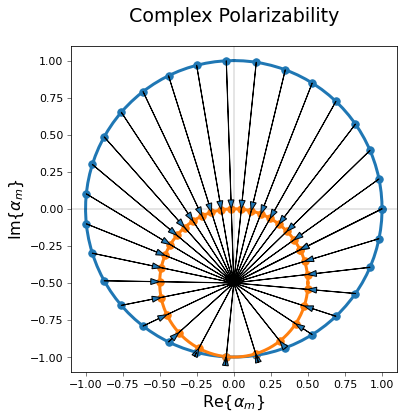

In [5]:
sa1 = SystemArchitecture()
sa2 = SystemArchitecture()
mp1 = ModulationPattern(sa1, modulation_type='ideal')
mp2 = ModulationPattern(sa2, modulation_type='euclidean-optimized')
dt = DataAnalysis()

sa1.guideIndex = 1.0
wv = sa1.wavelength_op
spc = wv/31
sa1.MakeLinearArray(spc, aperture_size = wv)
mp1.DirectedBeam(sa1,0)

sa2.guideIndex = 1.0
wv = sa2.wavelength_op
sa2.MakeLinearArray(spc, aperture_size = wv)
sa2.dipoleType = 'ideal-constrained-lorentzian'
mp2.DirectedBeam(sa2,0)

fig, ax = plt.subplots()
fig.set_size_inches(6,6)

theta = np.linspace(-270*np.pi/180, 90*np.pi/180, 100)
r = 1
xc = r*np.cos(theta)
yc = r*np.sin(theta)

ax.plot(xc,yc, linewidth=3)

theta = np.linspace(80*np.pi/180, -260*np.pi/180, 100)
r = 0.5
xc = r*np.cos(theta)
yc = r*np.sin(theta)-.5

dt.PlotComplexPolarizabilityValues(sa1.alpha,normalize=True, suppress_plot=True, plot_reference = ax, plot_size=8, dpi=100, marker_size=55)
dt.PlotComplexPolarizabilityValues(sa2.alpha,normalize=True, suppress_plot=True, plot_reference = ax, plot_size=8, dpi=100, marker_size=55, title="Complex Polarizability")


i=0
for z in sa1.alpha:
    x = np.real(z)
    y = np.imag(z)
    dx = np.real(sa2.alpha[i])-np.real(z)
    dy = np.imag(sa2.alpha[i])-np.imag(z)
    plt.arrow(x,y,dx,dy,head_width=0.04,zorder=10, length_includes_head=True, head_starts_at_zero=False)
    i=i+1

i=0
for z in sa2.alpha:
    x = np.real(z)
    y = np.imag(z)
    dx = 0-x
    dy = -.5-y
    plt.arrow(x,y,dx,dy,zorder=10)
    i=i+1

theta = np.linspace(0*np.pi/180, 360*np.pi/180, 100)
r = 0.5
xc = r*np.cos(theta)
yc = r*np.sin(theta)-.5

ax.plot(xc,yc, linewidth=3)

plt.show()

## 5. Using MetaWorks to study different modulation schemes

Within the MetaWorks framework, the modulation patterns are set by the ModulationPattern class. Once the system architecture has been defined, the ModulationPattern class is initialized with the 'modulation_type' keyword. If the dipole type is 'ideal_unconstrained', then the ideal modulation pattern is applied (as described above). However, if the dipole type is 'ideal-constrained-lorentzian', then the modulation type can be 'af-optimized' or 'euclidean-optimized'.

In [6]:
from SystemArchitecture import SystemArchitecture
from ModulationPattern import ModulationPattern
from SystemOutput import SystemOutput
from DataAnalysis import DataAnalysis

Initialize an aperture. We first assume ideal (unconstrained) dipoles and investigate the beam forming performance as a function of scan angle.

In [7]:
sa=SystemArchitecture()
dt = DataAnalysis()
sysOut = SystemOutput()
cm = 0.01
spc = 0.3*cm
sa.MakeLinearArray(spc, number_elements=160)
sa.dipoleType = 'ideal-unconstrained'

In [8]:
modPatt = ModulationPattern(sa, modulation_type='ideal')
modPatt.DirectedBeam(sa,20)

Confirm the aperture properties:

In [9]:
sa.SummarizeParameters()

Operating Frequency: 10.0 GHz
Operating Wavelength: 2.99792458 cm
Dipole Type: ideal-unconstrained
Layout Type: linear 1D
Dipole Spacing: 0.3cm
Aperture Size: 47.7cm
Number of Dipoles: 160
Feed Type: plane wave
Waveguide Index: 2.5
Modulation Type: ideal


In [10]:
fig = plt.figure(figsize=(24,18),dpi=300)
ScanAngles = [-75, -60, -45, -30, -15, 0, 15, 30, 45, 60, 75]
numAngles = len(ScanAngles)
nrows = np.rint(numAngles/3)
ncols = 3

<Figure size 7200x5400 with 0 Axes>

findfont: Font family ['sanserif'] not found. Falling back to DejaVu Sans.


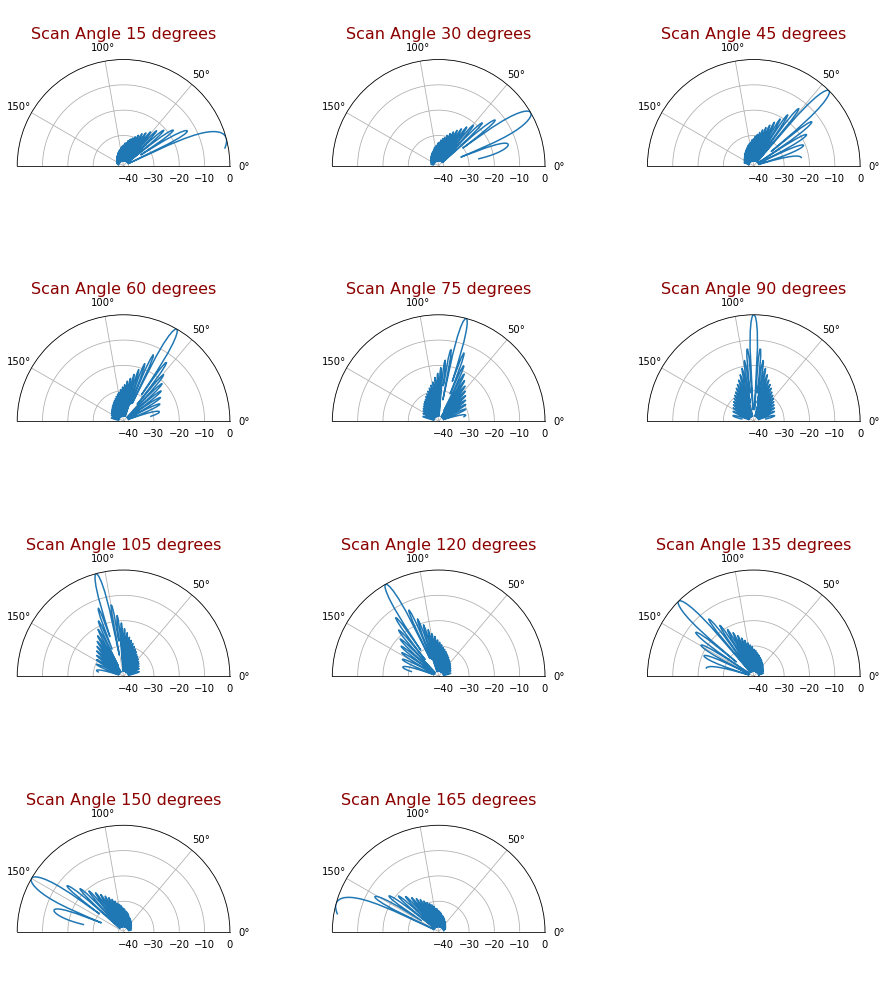

In [13]:
iPlotIndex = 1
for ScanAngle in ScanAngles:
    modPatt.DirectedBeam(sa, ScanAngle)
    rp=sysOut.RadiationPattern(sa,theta_start=-80,theta_stop=80,theta_num=250)
    ax = plt.subplot(nrows, ncols, iPlotIndex, projection='polar')
    dt.PlotPolar1D(rp, log_min=-40, log_max=0, title='Scan Angle '+str(ScanAngle+90)+' degrees',
               suppress_plot=True, plot_reference = ax, plot_size_x=8, plot_size_y=10)
    u = plt.gcf()
    u.set_size_inches(16,18)
    iPlotIndex = iPlotIndex + 1

plt.show()

***

Repeat the same study, with Lorentzian constrained polarizabilities:

In [14]:
sa.dipoleType = 'ideal-constrained-lorentzian'
modPatt = ModulationPattern(sa, modulation_type='af-optimized')

In [15]:
fig = plt.figure(figsize=(24,18),dpi=300)
ScanAngles = [-75, -60, -45, -30, -15, 0, 15, 30, 45, 60, 75]
numAngles = len(ScanAngles)
nrows = np.rint(numAngles/3)
ncols = 3

<Figure size 7200x5400 with 0 Axes>

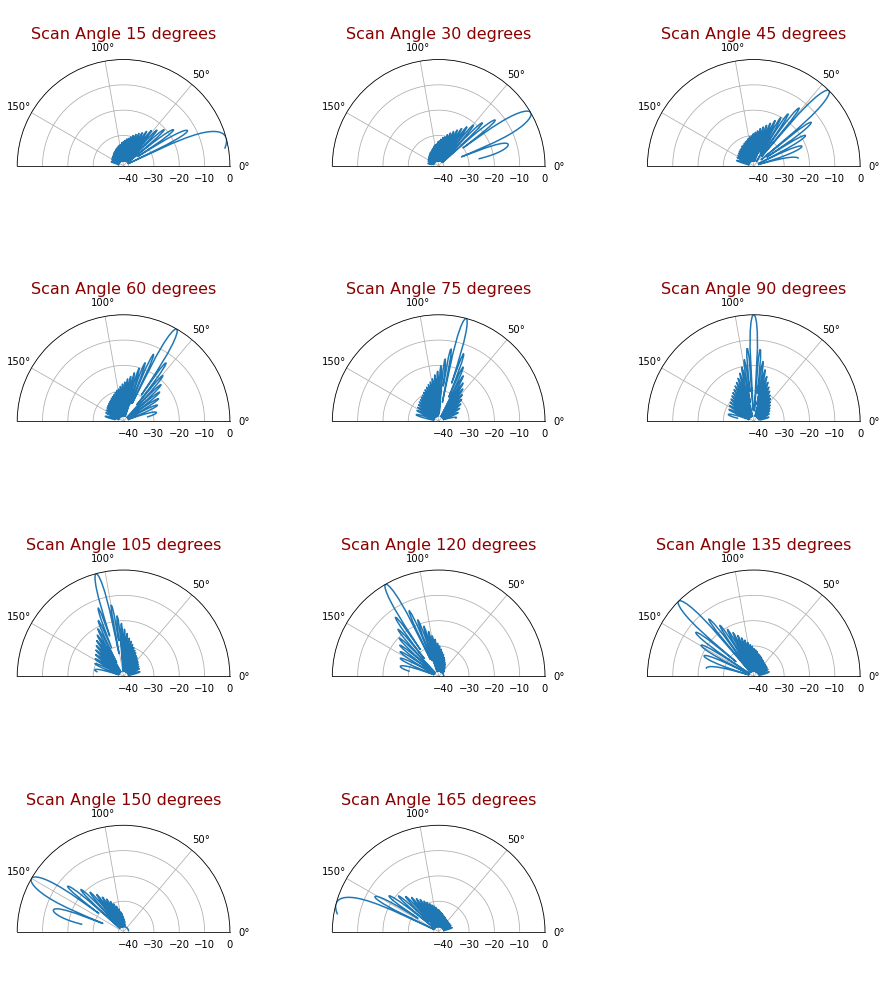

In [16]:
iPlotIndex = 1
for ScanAngle in ScanAngles:
    modPatt.DirectedBeam(sa, ScanAngle)
    rp=sysOut.RadiationPattern(sa,theta_start=-80,theta_stop=80,theta_num=250)
    ax = plt.subplot(nrows, ncols, iPlotIndex, projection='polar')
    dt.PlotPolar1D(rp, log_min=-40, log_max=0, title='Scan Angle '+str(ScanAngle+90)+' degrees',
               suppress_plot=True, plot_reference = ax, plot_size_x=8, plot_size_y=10)
    u = plt.gcf()
    u.set_size_inches(16,18)
    iPlotIndex = iPlotIndex + 1

plt.show()

***

Repeat the same study, with Euclidean mapped polarizabilities:

In [17]:
sa.dipoleType = 'ideal-constrained-lorentzian'
modPatt = ModulationPattern(sa, modulation_type='euclidean-optimized')

In [18]:
sa.SummarizeParameters()

Operating Frequency: 10.0 GHz
Operating Wavelength: 2.99792458 cm
Dipole Type: ideal-constrained-lorentzian
Layout Type: linear 1D
Dipole Spacing: 0.3cm
Aperture Size: 47.7cm
Number of Dipoles: 160
Feed Type: plane wave
Waveguide Index: 2.5
Modulation Type: euclidean-optimized


In [19]:
fig = plt.figure(figsize=(24,18),dpi=300)
ScanAngles = [-75, -60, -45, -30, -15, 0, 15, 30, 45, 60, 75]
numAngles = len(ScanAngles)
nrows = np.rint(numAngles/3)
ncols = 3

<Figure size 7200x5400 with 0 Axes>

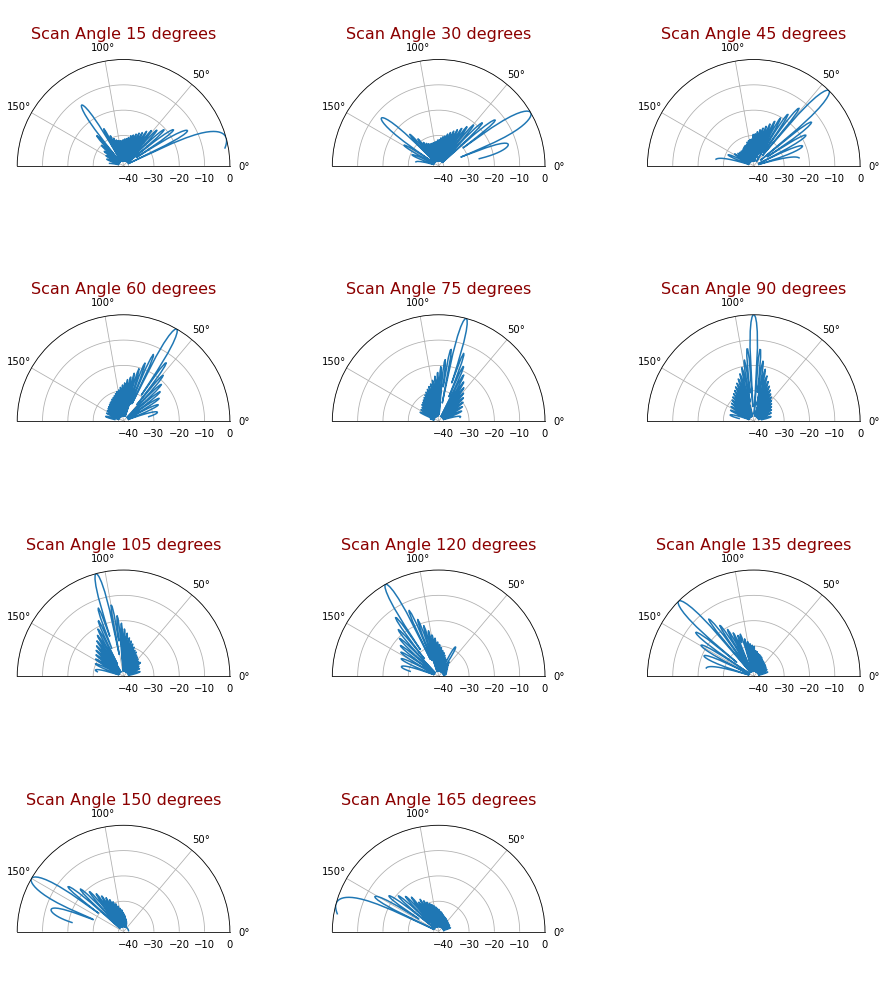

In [20]:
iPlotIndex = 1
for ScanAngle in ScanAngles:
    modPatt.DirectedBeam(sa, ScanAngle)
    rp=sysOut.RadiationPattern(sa,theta_start=-80,theta_stop=80,theta_num=250)
    ax = plt.subplot(nrows, ncols, iPlotIndex, projection='polar')
    dt.PlotPolar1D(rp, log_min=-40, log_max=0, title='Scan Angle '+str(ScanAngle+90)+' degrees',
               suppress_plot=True, plot_reference = ax, plot_size_x=8, plot_size_y=10)
    u = plt.gcf()
    u.set_size_inches(16,18)
    iPlotIndex = iPlotIndex + 1

plt.show()

In [21]:
sa.SummarizeParameters()

Operating Frequency: 10.0 GHz
Operating Wavelength: 2.99792458 cm
Dipole Type: ideal-constrained-lorentzian
Layout Type: linear 1D
Dipole Spacing: 0.3cm
Aperture Size: 47.7cm
Number of Dipoles: 160
Feed Type: plane wave
Waveguide Index: 2.5
Modulation Type: euclidean-optimized
